# 3.6 Estudo de casos


## Problema 1
Um tanque de comprimento $L$ tem uma secção transversal no formato de um semicírculo com raio $r$ (veja a figura). Quando cheio de água até uma distância $h$ do topo, o volume $V$ da água é: 

$$V=L \left[0.5 \pi r^2 - r^2 arcsen \left(\frac{h}{r} \right)-h \sqrt{r^2-h^2} \right]$$

Supondo que $L=10 ft$, $r = 1 ft$ e $V=12.4 ft^3$, encontre a profundidade do tanque com precisão de $0.0001 ft$ utilizando um programa em Python para o Método da Bisseção e Método de Newton. Apresente os códigos utilizados e comente os resultados obtidos.   

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/3_ZEROS_DE_FUNCOES/images/tanque_cilindrico.jpg" width="400">

### Resolução
Substituindo os valores de $L$, $r$ e $V$ na equação

$$ f(h)= \frac{V}{L} - \left[0.5 \pi r^2 - r^2 arcsen \left(\frac{h}{r} \right)-h \sqrt{r^2-h^2} \right]=0$$

obtem-se a seguinte função, cuja raiz é a solução do problema

$$ f(h) = arcsen(h)+h\sqrt{1-h^2} - 0.3308$$

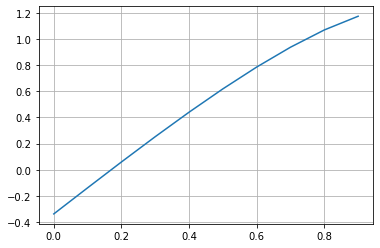

In [2]:
#% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = lambda h: np.arcsin(h)+h*(1-h**2)**0.5-0.338

# Localização por método gráfico 
h = np.arange(0.0, 1.0, 0.1)
plt.plot(h, f(h))
plt.grid()
plt.show()

Observa-se pelo gráfico que a raiz está entre 0,15 e 0,2.

In [3]:
import math 

f = lambda h: math.asin(h)+h*(1-h**2)**0.5-0.338

#como é uma secção transversal no formato de um semicírculo de raio r=1, h vai de 0 a 1
a = 0.15
b = 0.2
eps = 0.0001
err = 10.0
h_ant = a

while err>eps:
    h = (a+b)/2.
    err = abs(h-h_ant)/abs(h)
    h_ant = h
    print ("|h=%.4f"%h,"|err=%.4f"%err)
    
    if f(h)*f(a)<0:
        b = h
    else:
        a = h
#foi calculada a distância h do topo, então a profundidade é o raio=1 menos h
print ("A profundidade aproximada pelo método da bisseção é ",1.-h)

|h=0.1750 |err=0.1429
|h=0.1625 |err=0.0769
|h=0.1687 |err=0.0370
|h=0.1719 |err=0.0182
|h=0.1703 |err=0.0092
|h=0.1695 |err=0.0046
|h=0.1699 |err=0.0023
|h=0.1697 |err=0.0012
|h=0.1698 |err=0.0006
|h=0.1698 |err=0.0003
|h=0.1698 |err=0.0001
|h=0.1698 |err=0.0001
A profundidade aproximada pelo método da bisseção é  0.83018798828125


In [4]:
import math 

f = lambda h: math.asin(h)+h*(1-h**2)**0.5-0.338
df = lambda h: 1./(1.-h**2)**0.5 + (1.-h**2)**0.5 + h*0.5*(1-h**2)**(-0.5)*(-2*h)
                                                                       
h0 = 0.0
eps = 0.0001
err = 10.

while err>eps:
    h = h0 - f(h0)/df(h0)  
    err = abs(h-h0)/abs(h)
    h0 = h
    print ( "h=%.5f"%h, "| err=%.5f"%err)
#foi calculada a distância h do topo, então a profundidade é o raio=1 menos h
print ("A profundidade aproximada pelo método de Newton é ",1.-h)

h=0.16900 | err=1.00000
h=0.16982 | err=0.00483
h=0.16982 | err=0.00000
A profundidade aproximada pelo método de Newton é  0.830180200044136


**Comentário** <br>
É possível observar ambos os métodos convergem para a raiz, no entanto o método de Newton converge mais rapidamente, com apenas 3 iterações, enquanto o método da bisseção precisou de 12 iterações para atingir a precisão de 0,0001. 

___________________________________________________________________________

## Problema 2

Calcule todas as raízes de f(x)=lnx−x+2=0 pelo método do Aproximações Sucessivas (Ponto-Fixo) até que o erro relativo seja inferior a 0.0001. Em seguida, use o Método de Newton para resolver a mesma equação e compare os resultados comentando sobre o que você observou. 

### Resolução 
Para o método do Ponto Fixo, precisamos encontrar uma função de interação ϕ(x) escrevendo uma equação equivalente a f(x)=lnx−x+2=0 na forma x=ϕ(x). Existem muitas formas de fazer isso, as funções obtidas podem gerar sequências convergentes ou não. Se |ϕ′(x)|≤1 em torno da raiz, a sequência será convergente. Entre as equações possíveis, tem-se ϕ1(x)=ln(x)+2 e ϕ2(x)=e(x−2).


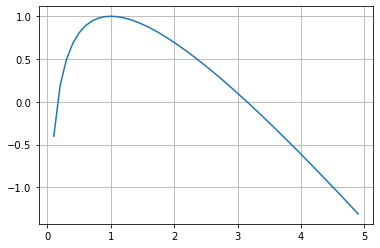

In [5]:
#% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Localização por método gráfico 
x = np.arange(0.1, 5.0, 0.1)
plt.plot(x, np.log(x)-x+2)
plt.grid()
plt.show()

Observa-se pelo gráfico que a função possui 2 raízes. Uma próxima de $x=0.0$ e outra próxima de $x = 3.0$. Analisando a convergência do método do ponto fixo, vemos que  $|\phi_1'(x)| = |\frac{1}{x}| \geq 1$ em torno de $0.0$ e $\leq 1$ em torno de $3.0$. Além disso,  $|\phi_2'(x)|=e^{(x-2)}\leq 1$ em torno de $0.0$ e $\geq 1$ em torno de $3.0$. Assim, devemos usar $\phi_1$ para a maior raiz e $\phi_2$ para a menor raiz.

In [6]:
import math

phi1 = lambda x: math.log(x)+2
phi2 = lambda x: math.exp(x-2)

def ponto_fixo(phi, x0, eps):
    err = 1.0
    while err>eps:
        x = phi(x0)   
        err = abs(x-x0)/abs(x)
        x0 = x
        print ( "| x=%.5f"%x, "| err=%.5f"%err)

print ("Raiz 1:")
ponto_fixo(lambda x: math.exp(x-2), 0.1, 0.0001)

print ("Raiz 2:")
ponto_fixo(lambda x: math.log(x)+2, 3.0, 0.0001)

Raiz 1:
| x=0.14957 | err=0.33141
| x=0.15717 | err=0.04836
| x=0.15837 | err=0.00757
| x=0.15856 | err=0.00120
| x=0.15859 | err=0.00019
| x=0.15859 | err=0.00003
Raiz 2:
| x=3.09861 | err=0.03182
| x=3.13095 | err=0.01033
| x=3.14134 | err=0.00331
| x=3.14465 | err=0.00105
| x=3.14570 | err=0.00033
| x=3.14604 | err=0.00011
| x=3.14614 | err=0.00003


Para o método de Newton, usamos a mesma função de iteração $x_{i+1} = x_1 - \frac{f(x_i)}{f'(x_i)}$ e variamos a aproximação inicial para obter cada uma das raízes. Para a menor fazemos $x_0 = 0,0$ e para a maior fazemos $x_0=3,0$. 

In [7]:
def newton(x0, eps):
    err = 10.0
    x_ant = x0
    while err>eps:
        x = x_ant-f(x_ant)/df(x_ant)    
        err = abs(x-x_ant)/x
        x_ant = x
        print ( "| x=%.5f"%x, "| err=%.5f"%err)

f = lambda x: math.log(x) - x + 2.0
df = lambda x: 1.0/x - 1.0
eps = 0.0001

print ("Newton x0 = 0.01")
newton(0.01, eps)

print ("Newton x0 = 3.5")
newton(3.5, eps)

Newton x0 = 0.01
| x=0.03642 | err=0.72539
| x=0.08740 | err=0.58336
| x=0.13765 | err=0.36503
| x=0.15691 | err=0.12278
| x=0.15858 | err=0.01052
| x=0.15859 | err=0.00007
Newton x0 = 3.5
| x=3.15387 | err=0.10975
| x=3.14620 | err=0.00244
| x=3.14619 | err=0.00000


**Comentário** <br>
Para o método do ponto fixo precisamos de duas funções de iteração diferentes. Para Newton, basta variar a aproximação inicial. Newton converge mais rápido.
___________________________________________________________________________

## Problema 3
A tensão elétrica sobre o capacitor de um circuito RLC-paralelo é dado por 

$$u(t)=u_0e^{-\alpha t} cos(w_d t), t \geq 0 $$ 

onde $u_0$ é a tensão inicial sobre o capacitor, 
$\alpha = \frac{1}{2RC}$ é a constante de amortecimento, $w_0=\frac{1}{\sqrt{LC}}$ é a frequência angular de oscilação (natural), 
$w_d=\sqrt{w_0^2-\alpha^2}$ é a frequência angular de oscilação (amortecida).
A tensão $u$ é dada em volts e o tempo $t$ em segundos. Considere um circuito em que $R=200 \Omega$, $L=0,3 H$, $C = 40 \mu F$ e $u_0 = 50 V$. Substitua os valores na equação e determine os instantes $t_1$, $t_2$ e $t_3$ em que a tensão atinge o valor $10 V$. Use o método das secantes e mais algum outro de sua escolha. Comente os resultados.  

### Resolução

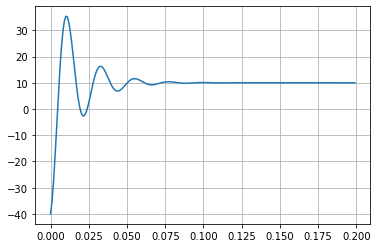

Buscando t1:
| x=0.0053066982
| x=0.0040857456
| x=0.0046245866
| x=0.0046151446
| x=0.0046150592
Buscando t2
| x=0.0207432848
| x=0.0188853104
| x=0.0195069191
| x=0.0193390109
| x=0.0193208301
| x=0.0193216099
Buscando t3
| x=0.0220852171
| x=0.0232817083
| x=0.0243766968
| x=0.0239041166
| x=0.0239452287
| x=0.0239476194


In [8]:
#% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

R = 200.0
L = 0.3
C = 0.000040
u0 = 50.0
#Ti = 300

alpha = 1./(2*R*C)
w0 = 1./math.sqrt(L*C)
wd = math.sqrt(w0**2 - alpha**2)

f = lambda t: 10-u0*np.exp(-alpha*t)*np.cos(wd*t)

t = np.arange(0.0, 0.2, 0.001)

fig = plt.figure()

plt.plot(t, f(t))
plt.grid()
plt.show()

def secantes(x0,x1):
    err = 10.0
    while err> 0.0001:
        x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
        err = abs(x-x1)/abs(x)   # calcula o erro relativo
        x0 = x1
        x1 = x
        print ("| x=%.10f"%x)


x0 = 0.0
x1 = 0.01
print ("Buscando t1:")
secantes(x0,x1)

print ("Buscando t2")
x0 = 0.0
x1 = 0.02
secantes(x0,x1)

print ("Buscando t3")
x0 = 0.0
x1 = 0.03
secantes(x0,x1)

**Comentário** <br>
Como pode ser visto no gráfico, a função possui 3 raízes, que correspondem aos tempos $t_1$, $t_2$ e $t_3$ em que a tensão atinge o valor de 10V. Assim, precisamos executar o método das secantes 3 vezes, com aproximações iniciais próximas a 0.01, 0.02 e 0.03 para obter as raízes.
___________________________________________________________________________


## Problema 4
Em Termodinâmica sob determinadas condições a relação entre o calor $Q$ fornecido a um gás e sua variação de temperatura $T_f - T_i$ é dada por 
$$ Q = nR \left[ A (T_f-T_i)+ \frac{B}{2}(T_f^2-T_i^2) + \frac{C}{3}(T_f^3-T_i^3) \right].$$
Para o gás metano $R=8,314  J/mol.K$ , $A=1,702$, $B=9,081 \times 10^{-3}K^{-1}$, $C=-2,164 \times 10^{-6} K^{-2}$. Em uma câmara tem-se $n=2 mol$ de metano a temperatura $T_i = 300 K$ qual será a temperatura final $T_f$ se $20 kJ$ de energia é absorvido pelo gás? 

### Resolução

In [9]:
R = 8.314
A = 1.702
B = 0.009081
C = -2.164 * (10**(-6))
n = 2.0
T_i = 300.0
Q = 20000.0

f = lambda x: n*R*((A*(x - T_i))+((B/2)*(x*x - T_i * T_i)+((C/3)*(x*x*x - T_i*T_i*T_i))))-Q

erro = 10.0
a = 500
b = 600
x_m = 1.0
x_ant = 1.0
i = 0

while erro > 0.001:
    x_m =((a+b)/2.0)
    if (f(a)*f(x_m)<0):
        a = a
        b = x_m
    else:
        a = x_m
        b = b
    print ( i, '| x =', x_m)
    erro = abs(x_m - x_ant)/abs(x_m)
    x_ant = x_m
    i = i+1

0 | x = 550.0
1 | x = 525.0
2 | x = 537.5
3 | x = 531.25
4 | x = 534.375
5 | x = 535.9375
6 | x = 535.15625
7 | x = 535.546875


**Comentário** <br>
Usando o método da bisseção, com a=500 e b=600 precisamos de 7 iteraçõespara chegar na solução com erro menor que 0,001.

## Problema 5

A resisitividade $\rho$ do silício dopado é baseada na carga $q$ de um elétron, na densidade eletrônica $n$ e na mobilidade de elétron $\mu$. A densidade eletrônica é dada em termos da densidade da dopagem $N$ e da densidade de transporte intríseca $n_i$. A mobilidade do elétron é descrita pela temperatura $T$, pela temperatura de referência $T_0$ e pela mobilidade de referência $\mu_0$. As equações necessárias para o cálculo da resistividade são
$$ \rho = \frac{1}{qn\mu}$$
onde 

$$n = \frac{1}{2} \left( N+\sqrt{N^2+4n^2_i} \right)$$ e $$\mu=\mu_0 \left(\frac{T}{T_0} \right)^{-2,42}$$

Determine $N$, dado que $T_0=300 K$, $T = 1000 K$, $\mu_0=1300 cm^2 (V s)^{-1}$, $q = 1,6\times10^{-19} C$, 
$n_ i = 6,21 \times 10^9 cm^{-3}$ e uma resistividade desejada de $\rho=6\times10^6$ $V$ $s$ $cm/C$. Use o Método das Secantes e outro de sua escolha e compare os resultados.  

### Resolução

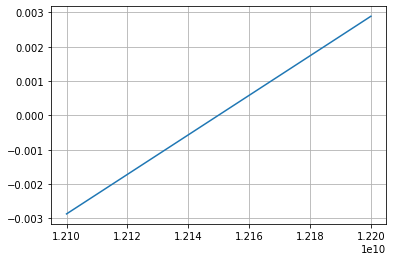

8 | x = 12150000000.0
9 | x = 12145000000.0
10 | x = 12147500000.0
11 | x = 12148750000.0
12 | x = 12149375000.0
13 | x = 12149687500.0
14 | x = 12149843750.0
15 | x = 12149921875.0
16 | x = 12149882812.5
17 | x = 12149863281.25
18 | x = 12149873046.875
19 | x = 12149877929.6875
20 | x = 12149880371.09375
21 | x = 12149881591.796875
22 | x = 12149880981.445312


In [10]:
#% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

T0 = 300
T = 1000
mu0 = 1300
q = 1.6*10**(-19)
ni = 6.21*10**9
rho=6*10**6
mu = mu0*(T/T0)**(-2.42)

f = lambda N: (rho*q*mu*0.5*(N + np.sqrt(N**2+4*ni**2)) - 1)

N = np.arange(1.21*10**10, 1.22*10**10, 100)

fig = plt.figure()
plt.plot(N, f(N))
plt.grid()
plt.show()

a = 1.214*10**10
b = 1.216*10**10
erro = 1000.

while erro > 0.0000001:
    x_m =((a+b)/2.0)
    if (f(a)*f(x_m)<0):
        a = a
        b = x_m
    else:
        a = x_m
        b = b
    print ( i, '| x =', x_m)
    erro = abs(x_m - x_ant)/abs(x_m)
    x_ant = x_m
    i = i+1


In [11]:
T0 = 300
T = 1000
mu0 = 1300
q = 1.6*10**(-19)
ni = 6.21*10**9
rho=6*10**6
mu = mu0*(T/T0)**(-2.42)

f = lambda N: (rho*q*mu*0.5*(N + np.sqrt(N**2+4*ni**2)) - 1)
err = 10.0
x0 = 1.2*10**10
x1 = 1.3*10**10

while err> 0.000001:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    err = abs(x-x1)/abs(x)   # calcula o erro relativo
    x0 = x1
    x1 = x
    print ("| x=%.9f"%x)

| x=12148815088.399784088
| x=12149873683.437911987
| x=12149881211.855869293


**Comentário** <br>
Esse é um problema que possui uma escala atípica, mas como método de Newton chega-se a solução com apenas 3 iterações. 

## Problema 6
De acordo com o *princípio de Arquimedes*, a força de *flutuação* é igual ao peso do fluido deslocado pela parte submersa de um objeto. Para o tronco de cone mostrado abaixo, use o método da bisseção e mais algum método de sua escolha para determinar a altura $h_1$ da parte que está acima da água. Use os seguintes valores para seus cálculos: $r_1 = 0,5 m$, $r_2 = 1 m$, $h = 1 m$, $\rho_f=densidade do tronco=200 kg/m^3$ e $\rho_w=densidade da água=1000 kg/m^3$. O volume do trondo de cone é dado por: $$V=\frac{\pi h}{3}(r_1^2+r_2^2+r_1 r_2)$$

### Resolução
A equação a ser resolvida é 

$$200 \frac{\pi1.0}{3} (0.5^2+1.0^2+1.0 \times 0.5) = 1000\frac{\pi (1-h_1)}{3}((0.5+h_1/2)^2+1.0^2+1.0 \times (0.5+h_1/2))$$

In [12]:
import math
a = 0.1
b = 1.0
err = 10
x_ant = 0.0

f = lambda h: 1.75-5*(1-h)*(1.0+(0.5+h/2.)**2+(0.5+h/2.))

while err > 0.001:
    x = (a+b)/2.0
    if f(a)*f(x)<0:
        b = x
    else:
        a = x
    err = abs(x - x_ant)/abs(x)
    x_ant = x
    print ("| h1=%.10f"%x)

| h1=0.5500000000
| h1=0.7750000000
| h1=0.8875000000
| h1=0.8312500000
| h1=0.8593750000
| h1=0.8734375000
| h1=0.8804687500
| h1=0.8769531250
| h1=0.8751953125
| h1=0.8760742188
| h1=0.8756347656


In [13]:
import math

err = 1.0
x0 = 0.5
x1 = 1.0

f = lambda h: 1.75-5*(1-h)*(1.0+(0.5+h/2.)**2+(0.5+h/2.))

while err>0.001:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    err = abs (x-x1)/abs(x)
    
    x0 = x1
    x1 = x 

    print ("| h1=%.10f"%x)  

| h1=0.8486486486
| h1=0.8740418082
| h1=0.8758028171
| h1=0.8757774319


## Problema 7: Lei dos gases ideais e não ideais (engenharia química)

A lei dos gases ideais é dada por 

$$ pV = nRT $$

Essa equação é mais apropriada para alguns gases do que outros. Além disso, é acurada apenas para um intervalo limitado de pressão e temperatura. 

Uma equação de estado alternativa, conhecida como _equação de Van der Waals_ é dada por 

$$ \left( p + \frac{a}{v^2} \right) (v-b) = RT$$

onde $v = V/n $ é o volume molar, $a$ e $b$ são constantes empíricas que dependem do gás.

Considere o problema de se fazer uma estimattiva acurada do volume $v$ do dióxido de carbono e do oxigênio, para diversas combinações de temperatura e pressão. Também deseja-se examidar o quão precisamente esses gases obedecem à lei dos gases ideais.

São fornecidos os seguntes dados:

$R = 0,082054 L \,atm/(mol \,K)$ 

Dióxido de carbono: $a=3,592$ e $b = 0,04267$

Oxigênio: $ a= 1,360$ e $b = 0,03183$

As pressões de interesse são 1, 10 e 100 atm , e  as temperaturas de 300, 500 e 700.
 
### Solução

Considerando a lei dos gases ideais tem-se



In [14]:
press = [1, 10,100]
temp = [300, 500,700] 


def calcula_vol(p,T):
    v = 0.082054*float(T)/float(p)
    print ("Para T=",T, "e p=",p, "o volume é v=",v,"L/mol")

for T in temp:
    for p in press:
        calcula_vol(p, T)
    

Para T= 300 e p= 1 o volume é v= 24.6162 L/mol
Para T= 300 e p= 10 o volume é v= 2.46162 L/mol
Para T= 300 e p= 100 o volume é v= 0.246162 L/mol
Para T= 500 e p= 1 o volume é v= 41.027 L/mol
Para T= 500 e p= 10 o volume é v= 4.1027000000000005 L/mol
Para T= 500 e p= 100 o volume é v= 0.41027 L/mol
Para T= 700 e p= 1 o volume é v= 57.4378 L/mol
Para T= 700 e p= 10 o volume é v= 5.74378 L/mol
Para T= 700 e p= 100 o volume é v= 0.574378 L/mol


Considerando a _equação de Van der Waals_, tem-se, pelo método da bissecao

In [15]:
# bisseção
import math

p = 1
T = 300

f = lambda v: (p + 3.592/v**2)*(v-0.04267)-0.082054*T     #dioxido
#f = lambda v: (p + 1.360/v**2)*(v-0.03183)-0.082054*T    #oxigenio

a = 24.
b = 25.

v_ant = 0.0
err = 10.

while err > 0.0001:
    v = (a+b)/2.0
    if f(v)*f(a) < 0:
        b = v
    else:
        a = v
        err = abs(v - v_ant)/abs(v)
        v_ant = v
    print ( v )


24.5
24.75
24.625
24.5625
24.53125
24.515625
24.5078125
24.51171875
24.513671875
24.5126953125
24.51220703125


Pelo método de Newton-Raphson

In [16]:
# -*- coding: utf-8 -*-
import math

p = 1
T = 300

a = 3.592
b = 0.04267

#a = 1.360
#b = 0.03183

f = lambda v: (p + a/v**2)*(v-b)-0.082054*T
flinha = lambda v: p - a/v**2 + 2*a*b/v**3

x = 30.0
x_ant = x
eps = 0.0001
err = 10.0
i = 0

while err>eps:
    x = x - f(x)/flinha(x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    i=i+1
    print (i, "| x=%.9f"%x, "| err=%.9f"%err)
    
    


1 | x=24.517487897 | err=0.223616389
2 | x=24.512588134 | err=0.000199888
3 | x=24.512588128 | err=0.000000000


Método da bissecao para todos os casos

In [17]:
# bisseção
import math
v=0.0
x_ant = 0.0

d = lambda v, p, T: (p + 3.592/v**2)*(v-0.04267)-0.082054*T
o = lambda v, p, T: (p + 1.360/v**2)*(v-0.03183)-0.082054*T

def bissecao(eps, a, b, p, T, f):
    v_ant = 0.0
    err = 10.
    while err > eps:
        v = (a+b)/2.0
        if f(v,p,T)*f(a,p,T) < 0:
            b = v
        else:
            a = v

        err = abs(v - v_ant)/abs(v)
        v_ant = v
    return v


print ("Dióxido de Carbono")
for T in temp:
    for p in press:
        v = bissecao(0.00001, 0.01, 100, p, T, d)
        print ("Para T=",T, "e p=",p, "o volume é v=",v,"L/mol") 

print ("Oxigênio")        
for T in temp:
    for p in press:
        v = bissecao(0.00001, 0.01, 100, p, T, o)
        print ("Para T=",T, "e p=",p, "o volume é v=",v,"L/mol") 

Dióxido de Carbono
Para T= 300 e p= 1 o volume é v= 24.51259252548218 L/mol
Para T= 300 e p= 10 o volume é v= 2.354504963159561 L/mol
Para T= 300 e p= 100 o volume é v= 0.07951069049537182 L/mol
Para T= 500 e p= 1 o volume é v= 40.982235984802244 L/mol
Para T= 500 e p= 10 o volume é v= 4.057775762081146 L/mol
Para T= 500 e p= 100 o volume é v= 0.36630179435014726 L/mol
Para T= 700 e p= 1 o volume é v= 57.418122749328596 L/mol
Para T= 700 e p= 10 o volume é v= 5.724178814888001 L/mol
Para T= 700 e p= 100 o volume é v= 0.5575539723038672 L/mol
Oxigênio
Para T= 300 e p= 1 o volume é v= 24.59269315719605 L/mol
Para T= 300 e p= 10 o volume é v= 2.4384079909324647 L/mol
Para T= 300 e p= 100 o volume é v= 0.2263596136868 L/mol
Para T= 500 e p= 1 o volume é v= 41.02571918487549 L/mol
Para T= 500 e p= 10 o volume é v= 4.1016403937339785 L/mol
Para T= 500 e p= 100 o volume é v= 0.4116146740317345 L/mol
Para T= 700 e p= 1 o volume é v= 57.446348686218265 L/mol
Para T= 700 e p= 10 o volume é v= 5.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/3_ZEROS_DE_FUNCOES/images/tab01.PNG" width="600">